# Traffic Sign Recognition

The Dataset: 

# Initialization

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pathlib
import os
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape

# General Parameters

In [77]:
# get num of classes
def get_num_classes(path):
    cats = 0
    for fname in os.listdir(path):
        try:
            bool = type(int(fname)) is int
            cats +=1
        except:
            pass
    #print(f'Number of classes: {cat_num}')
    return cats

In [78]:
# location of the data
train_dir = './dataset/GTSRB/Train'
test_dir = './dataset/GTSRB/Test'

#Generic parameters
img_width, img_height = 64, 64
batch_size = 250
cat_num = get_num_classes(train_dir)

## MLOps

Weights an Biases init

In [40]:
!wandb login

wandb: Currently logged in as: gaspia (use `wandb login --relogin` to force relogin)


In [41]:
import wandb
from wandb.keras import WandbCallback

wandb.init(project="CNN_TS", entity="gaspia", name="CNN_TS_00")

In [79]:
wandb.config = {
  "batch_size": batch_size,
  "img_width": img_width,
  "img_height": img_height,
  "cat_num": cat_num
}

In [80]:
print(wandb.config)

{'batch_size': 250, 'img_width': 64, 'img_height': 64, 'cat_num': 43}


# Dataset exploration and preprocessing

In [25]:
# training dataset
train_datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

# validation dataset
val_generator = train_datagen.flow_from_directory(
    train_dir,
    subset='validation',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='rgb',    
    seed=42,
    class_mode='categorical')

#test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Found 0 images belonging to 0 classes.


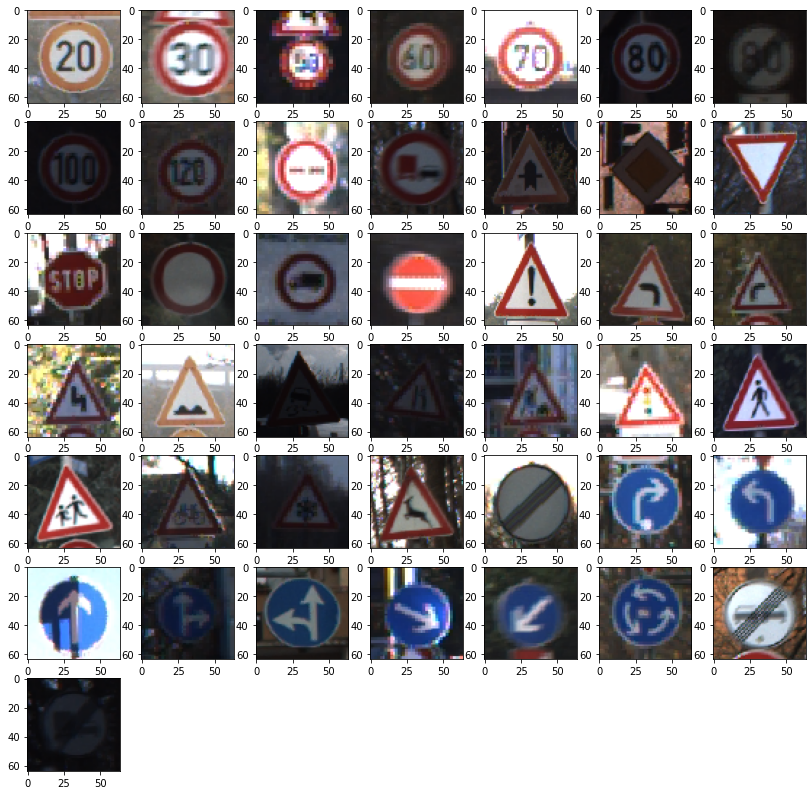

In [81]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_dir)
plt.figure(figsize=(14,14))
index = 0
for i in range(cat_num):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_width, img_height))
    plt.imshow(img)
plt.show()

## Class Distribution

## Analysis of the dataset

1. We can tell the image size is 
2. Some of the images have issues with low lighting / contrast / saturation which may become a problem for the model
3. 

# 